In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Deeper dive on distributions

### What probability distribution is each variable likely to take?

* The number of fans arriving at a Cleveland Indians baseball game per hour
* Heights of all citizens of a neighborhood in St. Louis, Missouri
* Number of times “rock” selected in “Rock, Paper, Scissors”

In [2]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Reproduce same exact results
np.random.seed(42)

<IPython.core.display.Javascript object>

#### The number of fans arriving at a Cleveland Indians baseball game

This is an example of a Poisson process.  We can play with what this might look like using `np.random.poisson()`.

Let's say we expect for 10,000 people to arrive every hour (i.e. `n = 10000` and `time = 1`).  However, if you look at the documentation of `np.random.poisson()` you'll see it asks for a parameter named `lam` which is short of lambda (or $\lambda$ as its often written).  This parameter is the rate and we can use `n` and `time` to get to it.

In [3]:
# np.random.poisson?

<IPython.core.display.Javascript object>

In [4]:
# We expect for 10,000 people to arrive every hour
n = 10000
time = 1  # in hours


lmbda = n / time
lmbda = lmbda / 60 / 60  # in seconds

print(f"Expect to see {lmbda} people per second ({n} per hour)")

Expect to see 2.7777777777777777 people per second (10000 per hour)


<IPython.core.display.Javascript object>

In [5]:
# Simulate an hours worth of arrivals
arrivals = np.random.poisson(lmbda, size=3600)

print("From our simulation:")
print(f"* {arrivals.sum()} people arrived in an hour")
print(f"* {arrivals.mean()} was the average number arriving per second")

From our simulation:
* 9907 people arrived in an hour
* 2.7519444444444443 was the average number arriving per second


<IPython.core.display.Javascript object>

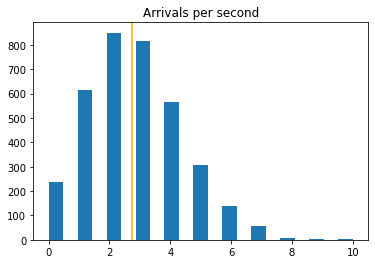

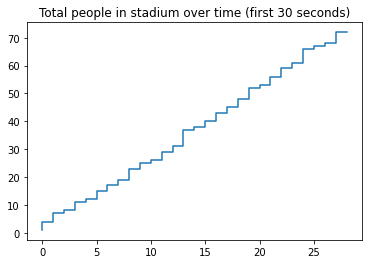

<IPython.core.display.Javascript object>

In [6]:
# Intentionally high bin count to highlight
# that the distribution is discrete
bins = 2 * len(set(arrivals)) - 1

plt.hist(arrivals, bins=bins)
plt.axvline(arrivals.mean(), c="orange")
plt.title("Arrivals per second")
plt.show()

total_people_arrived = np.cumsum(arrivals[1:30])
plt.step(range(len(total_people_arrived)), total_people_arrived)
plt.title("Total people in stadium over time (first 30 seconds)")
plt.show()

#### Heights of all citizens of a neighborhood in St. Louis, Missouri

I'll leave this one to you.

* What type of distribution would a measurement like height take?
* What parameters do you need to describe the shape of this type of distribution?
* Make up some values for the parameters (or research if you'd like).
* Generate a random sample using this distribution and these parameters.
* Generate a histogram of this random sample.
* Add a vertical line for the mean.

#### Number of times “rock” selected in “Rock, Paper, Scissors”

The binomial distribution is well suited for this process.  We can use `np.random.binomial()`. 

For playing with this one we're going to assume rock being thrown is random and occurs $\frac{1}{3}$ of the time (i.e. `p = 1 / 3`).  To investigate this we'll look at 100 games of rock paper scissors, so `n = 100`.  If we look at the documentation of `np.random.binomial()` we see that these two parameters are all we need.  Instead of just running this for 100 games, we can run it for 100 games many times.  Below I've set `size=1000` to have 100 games played 1000 times!  With this, we'll get out 1000 numbers, each number represents how many rocks (i.e. successes) appeared in the 100 games played.

In [7]:
# np.random.binomial?

<IPython.core.display.Javascript object>

In [8]:
# How many times will 'rock' appear per `n` games of RPS
n = 100
p = 1 / 3  # Assuming rock is random it will occur a third of the time

print(f"Expect to see {n * p:.2f} rocks per {n} rounds")

Expect to see 33.33 rocks per 100 rounds


<IPython.core.display.Javascript object>

From our simulation:
* 33.15 was the average number of rocks thrown per 100 games.


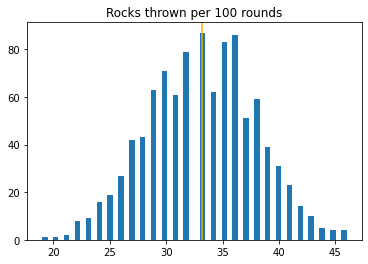

<IPython.core.display.Javascript object>

In [9]:
# 'Simulate' 100 RPS games 1000 times
rocks_thrown = np.random.binomial(n, p, size=1000)
print("From our simulation:")
print(
    f"* {rocks_thrown.mean():.2f} was the average number of rocks thrown per {n} games."
)

# Intentionally high bin count to highlight
# that the distribution is discrete
bins = 2 * len(set(rocks_thrown))

plt.hist(rocks_thrown, bins=bins)
plt.axvline(rocks_thrown.mean(), c="orange")
plt.title(f"Rocks thrown per {n} rounds")
plt.show()

We can take this even further with a very realistic setup: The RPS Pros Travaleing Showcase!!

> We're traveling the country to showcase the 2 best RPS players in the world.
There are `n_stops` stops on our RPS showcase tour.
There are `n_rounds` rounds per showcase.
Each round has `n_hands` hands of RPS thrown.
We assume that the chance of each option is equally likely.

We want to know how many rocks are thrown each round.  To do this, after each stop, we'll take the average of the number of rocks thrown per round.  When we make a historgram of these averages what shape should we expect?  What idea from statistics is this demonstrating?

In [10]:
n_stops = 10000
n_rounds = 5
n_hands = 10
p_of_rock = 1 / 3

print(f"Expect to see {p_of_rock * n_hands} rocks per round.")

Expect to see 3.333333333333333 rocks per round.


<IPython.core.display.Javascript object>

From our simulation:
* 3.33412 was the average number of rocks thrown per round.


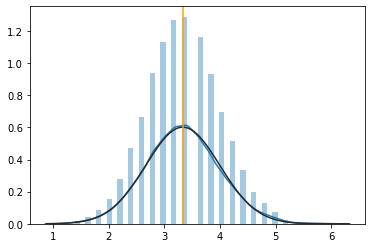

<IPython.core.display.Javascript object>

In [11]:
rocks_per_round = []
avg_rocks_per_round = []
for _ in range(n_stops):
    rocks_per_round_this_stop = np.random.binomial(n_hands, p_of_rock, size=n_rounds)

    rocks_per_round.extend(rocks_per_round_this_stop)
    avg_rocks_per_round.append(rocks_per_round_this_stop.mean())

print("From our simulation:")
print(f"* {np.mean(rocks_per_round)} was the average number of rocks thrown per round.")

sns.distplot(avg_rocks_per_round, fit=stats.norm)
plt.axvline(np.mean(avg_rocks_per_round), c="orange")
plt.show()

## Sampling!

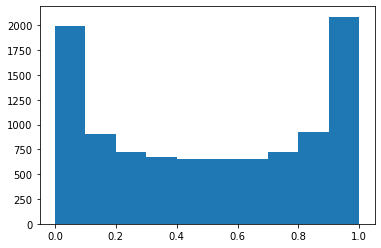

<IPython.core.display.Javascript object>

In [12]:
n = 10000
x = np.random.beta(0.5, 0.5, n)

plt.hist(x)
plt.show()

We can sample with or without replacement using `random.choice()` or `np.random.choice()`.  Below we create many samples from the population `x` and plot a histogram.  We then add lines to the histogram for the populuation mean and a line for the mean of our sample means (this could be called a "[grand mean](https://en.wikipedia.org/wiki/Grand_mean)")

In [13]:
n_samples = 1000
sample_size = 10000
replacement = True

means = []
for i in range(n_samples):
    sample = np.random.choice(x, sample_size, replacement)
    mean = sample.mean()
    means.append(mean)

<IPython.core.display.Javascript object>

In [14]:
true_mean = x.mean()
mean_est = np.mean(means)

<IPython.core.display.Javascript object>

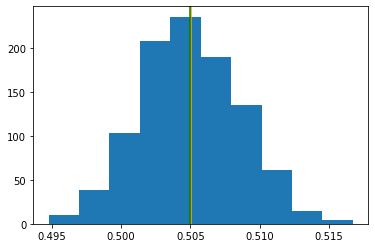

<IPython.core.display.Javascript object>

In [15]:
plt.hist(means)
plt.axvline(true_mean, c="orange")
plt.axvline(mean_est, c="green")
plt.show()

We're going to generate a new population using a seed to ensure we get the same population each time.

In [16]:
np.random.seed(1337)
x = np.random.normal(size=10000)

<IPython.core.display.Javascript object>

In [17]:
sample_size = 100
sample = np.random.choice(x, sample_size)

print(f"Population mean: {np.mean(x)}")
print(f"Sample mean: {np.mean(sample)}")

Population mean: 0.00202323482402236
Sample mean: 0.06502660747940771


<IPython.core.display.Javascript object>

A confidence interval can be calculated around our sample mean to express where we believe the true population mean to be.  We can calculate a 95% confidence interval of the mean 'by hand' using:

$$\bar{x} \pm 1.96 * \frac{\sigma}{\sqrt{n}}$$

Where 
* $\bar{x}$ is the sample mean.
* [1.96 is a value associated with 95%](https://en.wikipedia.org/wiki/1.96) (this can vary based on the confidence level desired).
* $\sigma$ represents the population standard deviation.  In practice, we might not have this value and so you will see $s$ used instead sometimes to represent the sample standard deviation.  Below we use $s$.
* $n$ is the sample size.

In [18]:
ci_hi = sample.mean() + 1.96 * sample.std() / np.sqrt(sample_size)
ci_lo = sample.mean() - 1.96 * sample.std() / np.sqrt(sample_size)

true_mean = np.mean(x)
captured_true_mean = true_mean > ci_lo and true_mean < ci_hi

print(f"({ci_lo}, {ci_hi})\n\nCaptures true mean: {captured_true_mean}")

(-0.1530788312339188, 0.2831320461927342)

Captures true mean: True


<IPython.core.display.Javascript object>

This can also be calculated with `scipy.stats.t.interval()`

In [19]:
stats.t.interval(0.95, len(sample) - 1, loc=np.mean(sample), scale=stats.sem(sample))

(-0.15688600298391492, 0.28693921794273036)

<IPython.core.display.Javascript object>

We can wrap this in a function to easily see the changes in the interval as our confidence level changes.  As our confidence level decreases, the interval narrows, and as our confidence level increases the interval widens.

In [20]:
def ci_mean(sample, confidence=0.95):
    ci = stats.t.interval(
        confidence, len(sample) - 1, loc=np.mean(sample), scale=stats.sem(sample)
    )

    return ci


ci_mean(sample, 0.95)

(-0.15688600298391492, 0.28693921794273036)

<IPython.core.display.Javascript object>

In [21]:
confidence_levels = [0.10, 0.90, 0.95, 0.99, 0.99999999]
for c in confidence_levels:
    ci = ci_mean(sample, c)
    print(f"{c * 100}% CI: {ci}")

10.0% CI: (0.05093668471433227, 0.07911653024448316)
90.0% CI: (-0.12066968724139697, 0.2507229022002123)
95.0% CI: (-0.15688600298391492, 0.28693921794273036)
99.0% CI: (-0.22870764900822038, 0.35876086396703577)
99.99999899999999% CI: (-0.6349245240648687, 0.7649777392941012)


<IPython.core.display.Javascript object>

We can also add a loop to see how often our confidence interval does not contain the population mean.

In [22]:
np.random.seed(1337)
x = np.random.normal(size=10000)
pop_mean = x.mean()

sample_size = 5

captured = []

for _ in range(100):
    sample = np.random.choice(x, sample_size)

    ci_lo, ci_hi = ci_mean(sample, 0.95)

    captured_true_mean = pop_mean > ci_lo and pop_mean < ci_hi
    captured.append(captured_true_mean)

<IPython.core.display.Javascript object>

In [23]:
sum(captured)

95

<IPython.core.display.Javascript object>

In this case, we see that 5 of our 100 confidence intervals did not contain the mean.  So 95% of our 95% confidence intervals captured the mean.